# Practical 3

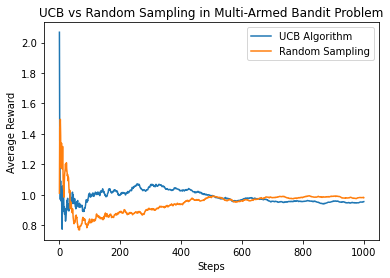

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Upper Confidence Bound (UCB) algorithm
def ucb_bandit(arms, num_steps, c):
    num_arms = len(arms)
    q_values = np.zeros(num_arms)
    n_pulls = np.zeros(num_arms)

    total_reward_ucb = 0
    rewards_ucb = []

    for t in range(1, num_steps + 1):
        # UCB action selection
        ucb_values = q_values + c * np.sqrt(np.log(t) / (n_pulls + 1e-5))
        action = np.argmax(ucb_values)

        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_ucb += reward

        # Update Q-values and counts
        n_pulls[action] += 1
        q_values[action] += (reward - q_values[action]) / n_pulls[action]

        rewards_ucb.append(total_reward_ucb / t)

    return rewards_ucb

# Random sampling algorithm
def random_bandit(arms, num_steps):
    total_reward_random = 0
    rewards_random = []

    for t in range(1, num_steps + 1):
        # Random action selection
        action = np.random.choice(len(arms))

        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_random += reward

        rewards_random.append(total_reward_random / t)

    return rewards_random

# Example usage
def main():
    num_arms = 5
    true_means = np.random.normal(0, 1, num_arms)

    arms = [lambda: np.random.normal(true_means[i], 1) for i in range(num_arms)]
    num_steps = 1000
    c = 2.0

    ucb_rewards = ucb_bandit(arms, num_steps, c)
    random_rewards = random_bandit(arms, num_steps)

    # Plot results
    plt.plot(range(1, num_steps + 1), ucb_rewards, label='UCB Algorithm')
    plt.plot(range(1, num_steps + 1), random_rewards, label='Random Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title('UCB vs Random Sampling in Multi-Armed Bandit Problem')
    plt.show()

main()

# practical 4

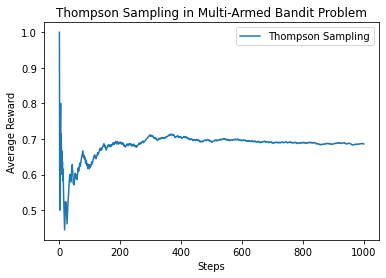

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Thompson Sampling algorithm
def thompson_sampling_bandit(arms, num_steps):
    num_arms = len(arms)
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)

    total_reward_ts = 0
    rewards_ts = []

    for t in range(1, num_steps + 1):
        # Thompson Sampling action selection
        sampled_theta = np.random.beta(successes + 1, failures + 1)
        action = np.argmax(sampled_theta)

        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_ts += reward

        # Update successes and failures
        if reward == 1:
            successes[action] += 1
        else:
            failures[action] += 1

        rewards_ts.append(total_reward_ts / t)

    return rewards_ts

# Example usage
def main():
    num_arms = 5
    true_probs = np.random.uniform(0.2, 0.8, num_arms)

    arms = [lambda p=true_probs[i]: np.random.binomial(1, p) for i in range(num_arms)]
    num_steps = 1000

    ts_rewards = thompson_sampling_bandit(arms, num_steps)

    # Plot results
    plt.plot(range(1, num_steps + 1), ts_rewards, label='Thompson Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title('Thompson Sampling in Multi-Armed Bandit Problem')
    plt.show()

main()

# practical 5

In [1]:
import numpy as np

class QLearning:
    def __init__(self, num_states, num_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.num_states = num_states
        self.num_actions = num_actions
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration-exploitation trade-off
        self.q_table = np.zeros((num_states, num_actions))

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            # Explore: choose a random action
            return np.random.choice(self.num_actions)
        else:
            # Exploit: choose the action with the highest Q-value
            return np.argmax(self.q_table[state, :])

    def update_q_table(self, state, action, reward, next_state):
        # Q-value update using the Q-learning formula
        self.q_table[state, action] = (1 - self.alpha) * self.q_table[state, action] + \
                                      self.alpha * (reward + self.gamma * np.max(self.q_table[next_state, :]))

def run_q_learning(env, num_episodes):
    num_states = env.shape[0]
    num_actions = env.shape[1]
    agent = QLearning(num_states, num_actions)

    for episode in range(num_episodes):
        state = np.random.randint(num_states)  # Start from a random state

        while True:
            action = agent.select_action(state)
            next_state = np.random.choice(num_states)  # Choose a random next state
            reward = env[state, action]

            agent.update_q_table(state, action, reward, next_state)

            state = next_state

            if state == num_states - 1:  # Reach the terminal state
                break

    return agent.q_table

# Example usage with a simple grid world
if __name__ == "__main__":
    # Define a simple 5x6 grid world with rewards
    # -1: empty, 0: obstacle, 100: goal
    grid_world = np.array([[1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 0, 1, 100],
                           [1, 1, 1, 0, 1, 1],
                           [0, 1, 1, 0, 1, 100],
                           [1, 0, 1, 1, 0, 100]])

    num_episodes = 1
    learned_q_table = run_q_learning(grid_world, num_episodes)

    print("Learned Q-Table:")
    print(learned_q_table)


Learned Q-Table:
[[0.109  0.     0.     0.     0.     0.    ]
 [0.     0.2791 0.     0.     0.     0.    ]
 [0.19   0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]]


# practical 6

In [5]:
import numpy as np

class MarkovProcess:
    def _init_(self, transition_matrix, initial_state):
        """
        Initialize the Markov process.

        Parameters:
            - transition_matrix: a 2D numpy array representing the transition probabilities.
            - initial_state: the initial state of the process.
        """
        self.transition_matrix = transition_matrix
        self.current_state = initial_state

    def step(self):
        """
        Perform one step of the Markov process by transitioning to a new state based on the
        probabilities in the transition matrix.

        Returns:
            - new_state: the new state after the transition.
        """
        transition_probs = self.transition_matrix[self.current_state]
        new_state = np.random.choice(len(transition_probs), p=transition_probs)
        self.current_state = new_state
        return new_state

# Example usage
def main():
    # Define a transition matrix for a simple 3-state Markov chain
    # Rows represent current state, columns represent next state
    transition_matrix = np.array([
        [0.7, 0.2, 0.1],
        [0.3, 0.4, 0.3],
        [0.1, 0.3, 0.6]
    ])

    # Initial state
    initial_state = 0

    # Create a Markov process
    markov_process = MarkovProcess(transition_matrix, initial_state)

    # Perform 10 steps of the Markov process
    for _ in range(10):
        new_state = markov_process.step()
        print(f"Current State: {markov_process.current_state}, Next State: {new_state}")

    main()

# practical 9

In [2]:
import numpy as np

# Define the grid world environment
class GridWorld:
    def __init__(self):
        self.num_rows = 3
        self.num_cols = 4
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
        self.num_actions = len(self.actions)
        self.start_state = (2, 0)
        self.goal_state = (0, 3)
        self.state_space = [(i, j) for i in range(self.num_rows) for j in range(self.num_cols)]
        self.state_values = np.zeros((self.num_rows, self.num_cols))

# Function to perform Monte Carlo simulation using first visit
def monte_carlo_first_visit(env, num_episodes):
    returns_sum = np.zeros_like(env.state_values)
    returns_count = np.zeros_like(env.state_values)

    for episode in range(num_episodes):
        episode_states = []
        episode_returns = 0
        state = env.start_state

        while state != env.goal_state:
            action = np.random.choice(env.num_actions)
            next_state = tuple(np.clip(np.array(state) + np.array(env.actions[action]), 0, [2, 3]))

            episode_states.append((state, action))
            state = next_state

        # Calculate returns and update state values
        for t, (state, action) in enumerate(episode_states):
            G = sum([2**i for i in range(t, len(episode_states))])
            returns_sum[state] += G
            returns_count[state] += 1
            env.state_values[state] = returns_sum[state] / returns_count[state]

    return env.state_values

# Function to print the state values
def print_state_values(state_values):
    for i in range(state_values.shape[0]):
        for j in range(state_values.shape[1]):
            print(f'{state_values[i, j]:.2f}\t', end='')
        print()

# Main function
def main():
    np.random.seed(42)
    env = GridWorld()

    # Perform Monte Carlo simulation
    num_episodes = 1000
    state_values = monte_carlo_first_visit(env, num_episodes)

    # Print the state values
    print("State Values after Monte Carlo Simulation:")
    print_state_values(state_values)

if __name__ == "__main__":
    main()


State Values after Monte Carlo Simulation:
22907290640316802910518123764215582866742390773168941602785336713813373747200.00	15945390292910884554475493265155944522369760054434879587024531041147649261568.00	10175829389257880317449802437282070514022721526043978796618925210619892203520.00	0.00	
30914219215233270990083123473716055740280525051653194925805768594914659008512.00	30179419894793377803751790573501561312393931169264721841576288547151772909568.00	20781477438557681856962696050985992406657381378105589815886085582411014340608.00	12984660875238252603635797604769543317479383991890994545265556825859761897472.00	
21709853088163511517892750105410980446415614106453138402289214202107754708992.00	25348811817494575775795431325317134606312851491360220436267386186682681262080.00	20534296299452607149639710702438873109110005972684615570748315182612619460608.00	27471052026390648271093832473403250653010884440846982043090726495189077065728.00	


# practical 8

In [3]:
import numpy as np

class GridWorld:
    def __init__(self):
        self.num_rows = 3
        self.num_cols = 4
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
        self.num_actions = len(self.actions)
        self.start_state = (2, 0)
        self.goal_state = (0, 3)
        self.state_space = [(i, j) for i in range(self.num_rows) for j in range(self.num_cols)]
        self.state_values = np.zeros((self.num_rows, self.num_cols))
        self.policy = np.ones((self.num_rows, self.num_cols, self.num_actions)) / self.num_actions

    def take_action(self, state, action):
        next_state = tuple(np.clip(np.array(state) + np.array(action), 0, [self.num_rows - 1, self.num_cols - 1]))
        return next_state

def policy_evaluation(env, policy, gamma=0.9, theta=1e-6):
    while True:
        delta = 0
        for state in env.state_space:
            v = env.state_values[state]
            temp_value = 0
            for action in range(env.num_actions):
                next_state = env.take_action(state, env.actions[action])
                temp_value += policy[state][action] * (env.state_values[next_state] + gamma * env.state_values[next_state])
            env.state_values[state] = temp_value
            delta = max(delta, abs(v - env.state_values[state]))
        if delta < theta:
            break

def policy_improvement(env, gamma=0.9):
    policy_stable = True
    for state in env.state_space:
        old_action = np.argmax(env.policy[state])
        action_values = np.zeros(env.num_actions)
        for action in range(env.num_actions):
            next_state = env.take_action(state, env.actions[action])
            action_values[action] = env.state_values[next_state] + gamma * env.state_values[next_state]
        best_action = np.argmax(action_values)
        if old_action != best_action:
            policy_stable = False
        env.policy[state] = np.eye(env.num_actions)[best_action]
    return policy_stable

def policy_iteration(env, gamma=0.9, theta=1e-6):
    while True:
        policy_evaluation(env, env.policy, gamma, theta)
        policy_stable = policy_improvement(env, gamma)
        if policy_stable:
            break

# Example usage with a simple grid world
if __name__ == "__main__":
    env = GridWorld()

    print("Initial State Values:")
    print(env.state_values)

    print("\nInitial Policy:")
    print(env.policy)

    policy_iteration(env)

    print("\nOptimal State Values:")
    print(env.state_values)

    print("\nOptimal Policy:")
    print(env.policy)


Initial State Values:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Initial Policy:
[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]

Optimal State Values:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Optimal Policy:
[[[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]]
